UA week 1 project for foundation of information is about getting the jobs details from TMDB (the movies database).
Following is what has been done
1. created an account in TMDB and created an API key
2. Went thru basic operations of what can be fecthed from TMDB
3. What metadata does the basic search contain
4. what properties does a particular movie contain
5. The API documenation also shows how you can get the job data out of TMDB , this was done next

In [1]:
%pip install pandas

In [2]:
import requests
import pandas as pd

api_key = 'b7351bfbb4088b238d08246cb361e44d'
url = 'https://api.themoviedb.org/3/configuration/jobs'

# when using dev container behind company proxy use TLS false
# response = requests.get(url, params={'api_key': api_key},verify=False)
response = requests.get(url, params={'api_key': api_key})
data = response.json()

# df = pd.DataFrame([data])
# print(df.head())
# saw that the data format needs to be flattened

# flattern format [{department: value, jobs: []}]

flat_data = []
for item in data:
    dep = item['department']
    for job in item['jobs']:
        flat_data.append({'department':dep, 'jobs':job})

df = pd.DataFrame(flat_data)
print(df.head())
df.to_csv('jobs.csv',index=False)

  department                     jobs
0      Sound  Original Music Composer
1      Sound           Sound Designer
2      Sound             Sound Editor
3      Sound           Sound Director
4      Sound              Sound Mixer


Once we have the data in the CSV then its time for us to build some analytics on to it , based on pervious learnings
we will use matpilotlib and sns with pandas

In [ ]:
%pip install matplotlib seaborn

           department  job_count
0              Actors          5
1                 Art        105
2              Camera         83
3   Costume & Make-Up         83
4                Crew        189
5           Directing         28
6             Editing         49
7            Lighting         32
8          Production        122
9               Sound         94
10     Visual Effects        105
11            Writing         45


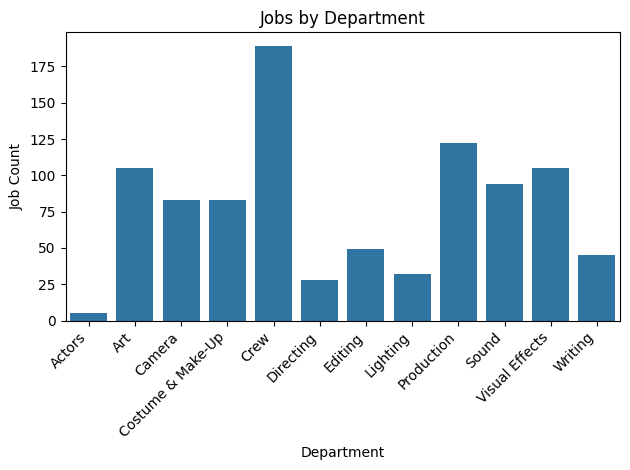

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('jobs.csv')

job_by_dept=df.groupby('department')['jobs'].nunique()

u_job_by_dept=job_by_dept.reset_index()
u_job_by_dept.columns=['department','job_count']
print(u_job_by_dept)

sns.barplot(data=u_job_by_dept, x='department', y='job_count')
plt.xlabel('Department')
plt.ylabel('Job Count')
plt.title('Jobs by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()